# overshooting

학습 과정에서 가중치 업데이트가 너무 크게 이루어져서 최적화를 불안정하게 하는 현상

즉, Gradient가 큰 곳에서 시작할 경우 관성을 이기지 못하고 최소 지점을 지나쳐 버리는 현상

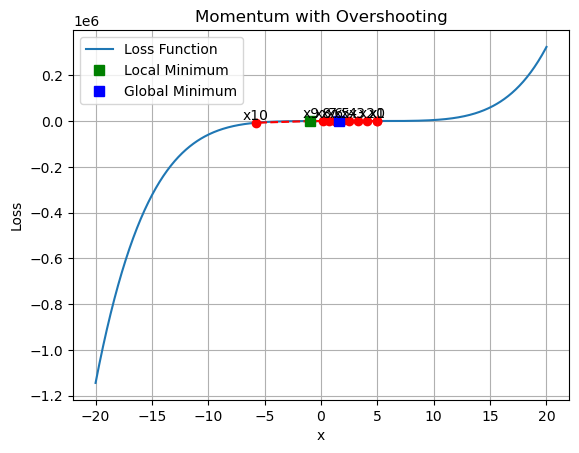

최소값의 x: 	-186.59
최소값의 손실: 	-7293.99


In [176]:
import numpy as np
import matplotlib.pyplot as plt

# 손실 함수 정의
def loss_function(x):
    return (6*x**5 - 75*x**4 + 350*x**3 - 750*x**2 + 720*x)/30

# 손실 함수의 도함수 정의
def gradient(x):
    return x**4 - 10*x**3 + 35*x**2 - 50*x + 24

# 초기값 설정
x = 5
learning_rate = 0.039
momentum = 0.9
num_iterations = 11  #횟수를 늘리면 발산하는 것을 볼수 있음
                     #범위도 함께 늘려야 함


# 그래프를 위한 초기화
x_values = []
loss_values = []

# 경사 하강법 with momentum 적용
velocity = 1
for i in range(num_iterations):
    plt.text(x, loss_function(x), "x%d"%i, ha='center', va='bottom', fontsize=10)
    x_values.append(x)
    loss = loss_function(x)
    loss_values.append(loss)

    # Momentum 업데이트
    velocity = momentum * velocity - learning_rate * gradient(x)
    x += velocity

# 그래프 그리기
x_range = np.linspace(-20, 20, 600)
plt.plot(x_range, loss_function(x_range), label="Loss Function")
plt.plot(x_values, loss_values, marker='o', color='r', linestyle='--')
plt.plot(-1, loss_function(-1), 'gs', markersize=7, label='Local Minimum')
plt.plot(1.6, loss_function(1.6), 's', markersize=7, color='b', label='Global Minimum')

plt.xlabel("x")
plt.ylabel("Loss")
plt.legend()
plt.title("Momentum with Overshooting")
plt.grid()
plt.show()

print("최소값의 x: \t%0.2f"%x)
print("최소값의 손실: \t%0.2f"%loss)
